<a href="https://www.kaggle.com/code/yunasheng/from-csv-to-data-visualization?scriptVersionId=164076309" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align: center"><img src="https://substackcdn.com/image/fetch/w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F1cd5fbcb-a8fb-4ac6-8b7e-e56ad38d8bf3_1644x1148.png" width="100%" heigh="100%" alt="Retrieve&Re-Rank pipeline"></div>

Data storytelling is a powerful tool for communicating development data to the world.

In [1]:
import pandas as pd

# Load and preprocessthe dataset
data = pd.read_csv('/kaggle/input/un-food-security/FAOSTAT_data_en_2-23-2024.csv')

# Adjusted preprocess for the 'Year' column to accurately represent the middle year of the range
def get_middle_year(year_range):
    start_year, end_year = map(int, year_range.split('-'))
    # Calculate middle year correctly as per the given instruction
    return start_year + (end_year - start_year) // 2

data['Year'] = data['Year'].apply(get_middle_year)

# Preprocess the 'Value' column to remove any comparison operators and convert to float
def clean_value(value):
    if isinstance(value, str):
        if value.startswith('<') or value.startswith('>'):
            # Assume values like '<0.1' to be '0.1' for simplicity
            return float(value[1:].strip())
        return float(value.strip())
    return value

data['Value'] = data['Value'].apply(clean_value)

And then we can do a bit of fancy footwork with Python code — to create a Pandas data frame that we can use to visualize our data.

# Story 1. Global Prevalence of Undernourishment

For this exercise, we want to find the real story about the levels of undernourishment around the globe. Higher levels of undernourishment are a pretty clear indicator that food security in a particular area is low.

With our data set, to analyze the “Prevalence of undernourishment” indicator across all countries, we can first aggregate the data to calculate the global average prevalence of undernourishment per year.

This involves filtering the dataset for the specific indicator, converting the Year column to a numeric format for easier analysis, and then calculating the mean value of undernourishment for each year across all countries.

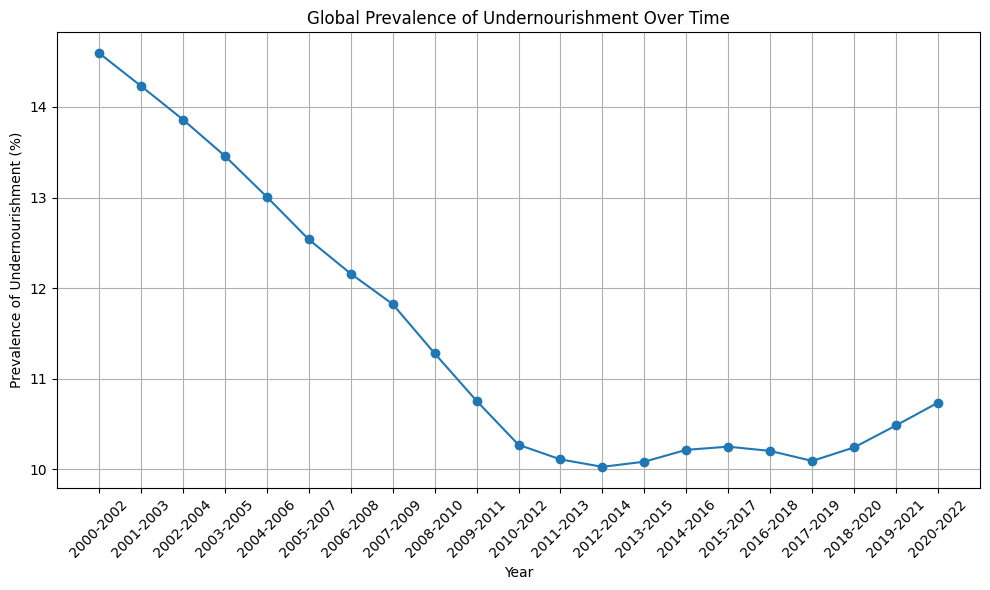

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocessthe dataset
data = pd.read_csv('/kaggle/input/un-food-security/FAOSTAT_data_en_2-23-2024.csv')

# INCLUDE PANDAS DATAFRAME CODE (FROM ABOVE) PASTE IT ALL HERE

data['Value'] = data['Value'].apply(clean_value)

# Filtering and calculating global average for undernourishment
undernourishment_data = data[data['Item'] == 'Prevalence of undernourishment (percent) (3-year average)']
global_avg = undernourishment_data.groupby('Year')['Value'].mean().reset_index()

# Creating the Matplotlib plot
plt.figure(figsize=(10, 6))
plt.plot(global_avg['Year'], global_avg['Value'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Prevalence of Undernourishment (%)')
plt.title('Global Prevalence of Undernourishment Over Time')
plt.grid(True)

# Correcting the display of years on the x-axis
plt.xticks(global_avg['Year'], rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

The relevant code in this example includes:

Create the `Matplotlib plot`: Plot the data using plt.plot, specifying 'Year' on the x-axis and 'Value' on the y-axis. Customize the plot by adding labels for the x and y-axes and setting a title.

`Display of years on the x-axis`: Use plt.xticks to set the x-axis tick positions to match the years from the 'Year' column, and rotate the tick labels by 45 degrees for better readability.

`Display the plot`: Use plt.tight_layout() to ensure that all elements of the plot fit nicely within the figure. Finally, use plt.show() to display the plot.

**What Data Stories Can We See Here**?

Wow, this is a very interesting chart. We can see a concerted, and successful global effort to reduced the prevalence of undernourishment from `2001–2012`.

From `2012 to 2018`, we see the world maintaining the same level — then what the heck happened from 2018–2021?

According to the United Nations, the number of people in the world affected by hunger increased during this time mostly because of the `COVID-19 pandemic`. e shadow of the COVID-19 pandemic. It is estimated that between 720 and 811 million people in the world faced hunger in 2020 (somewhere around 118 million more people in 202 than in 2019).

# Story 2. What Is The Story at the Country Level?

Country focus

First, we’ll filter the dataset for the selected countries and the “Prevalence of undernourishment” indicator. Then, we’ll create a line chart to compare these countries’ undernourishment trends over time.

Our Python Code:

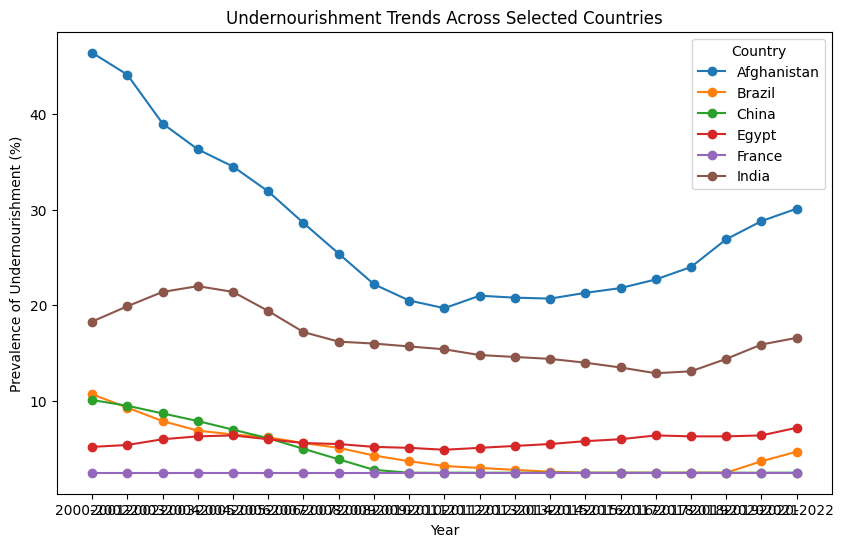

In [3]:
# INCLUDE PANDAS DATAFRAME CODE (FROM ABOVE) PASTE IT ALL HERE

# Select countries for comparison
selected_countries = ['Afghanistan', 'Brazil', 'China', 'Egypt', 'France', 'India']

# Filter data for selected countries and undernourishment indicator
selected_data = data[(data['Area'].isin(selected_countries)) &
                     (data['Item'] == 'Prevalence of undernourishment (percent) (3-year average)')]

# Calculate the average undernourishment for each country per year
country_avg = selected_data.groupby(['Year', 'Area'])['Value'].mean().unstack()

# Create the plot
plt.figure(figsize=(10, 6))
for country in selected_countries:
    plt.plot(country_avg.index, country_avg[country], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Prevalence of Undernourishment (%)')
plt.title('Undernourishment Trends Across Selected Countries')
plt.grid(False)
plt.legend(title='Country')

plt.show()

This code snippet performs the following actions:

1.`Choose a set of countries`: You can hard-code any valid country into this list to display as you like. The selected_data variable then contains only the data for those countries in the list.

2.`Matplotlib Figure Initialization`: plt.figure(figsize=(10, 6)): A blank canvas for the plot is created with specific dimensions (10 inches in width and 6 inches in height).

3.`Loop Through Selected Countries`: for country in selected_countries:: Iterates through the selected countries for comparison.

4.`Creating Line Plots`: plt.plot(country_avg.index, country_avg[country], marker='o', label=country): Inside the loop, this line generates individual line plots for each country's undernourishment data. It uses markers to indicate data points and labels each line with the country's name.

5.`Labeling Axes and Title: plt.xlabel('Year')`: Sets the x-axis and y-axis label. Set the title.

What Data Stories Can We See Here?

The trends of countries such as `Afghanistan`, `India`, and `Brazil` follow the same as we saw in the previous global average chart. It is interesting to note that France maintains a stable food supply, even during Covid-19.

`China` and `Brazil` have demonstrated notable decreases in undernourishment rates, indicating the success of their comprehensive agricultural policies and economic growth that enhanced food access.

This suggests strong governmental interventions and investments in agriculture have been effective in these nations.

Conversely, Afghanistan’s data reflect persistently high levels of undernourishment, underscoring the detrimental impacts of political instability and conflict on food security.

This highlights a clear (and known) correlation between `peace, political stability, and food security`, where conflict directly impedes agricultural productivity and food distribution.

# In Summary…

Two main stories emerge from this analysis:

`Global Prevalence of Undernourishment`: The analysis shows a reduction in global undernourishment from 2001 to 2012, followed by stability until a spike from 2018 to 2021, attributed to the COVID-19 pandemic’s impact.

`Undernourishment at the Country Level`: France exhibits stable food security, while China and Brazil show significant improvements due to effective agricultural policies and economic growth. India’s situation reflects a rapidly increasing population outpacing economic growth that strains natural resources and land availability. Afghanistan’s situation reflects the negative impact of political instability and conflict on food security.

**Credit**:

https://johnloewen.substack.com/p/data-storytelling-with-python-from?utm_source=profile&utm_medium=reader2